# FMCG Sales Analysis and Forecasting (2022-2024)

#### Project Goal: To analyze a 3-year sales dataset to identify key trends, build a predictive sales forecast, and determine the primary drivers of high-volume sales.

## Part 1: Data Loading and Exploratory Analysis (EDA)


In [1]:
import pandas as pd

file_path = 'sales_data.csv' 
df = pd.read_csv(file_path)


df['revenue'] = df['units_sold'] * df['price_unit']


df['date'] = pd.to_datetime(df['date'])


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


print("--- DataFrame with New Features ---")
print(df.head())

print("\n--- Updated DataFrame Info ---")
df.info()

--- DataFrame with New Features ---
        date     sku     brand    segment category   channel      region  \
0 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail  PL-Central   
1 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-North   
2 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk    Retail    PL-South   
3 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount  PL-Central   
4 2022-01-21  MI-006  MiBrand1  Milk-Seg3     Milk  Discount    PL-North   

   pack_type  price_unit  promotion_flag  delivery_days  stock_available  \
0  Multipack        2.38               0              1              141   
1     Single        1.55               1              3                0   
2     Carton        4.00               0              5              118   
3     Single        5.16               0              2               81   
4     Single        7.66               0              4              148   

   delivered_qty  units_sold  revenue  year  month

### 1.1 Monthly Sales Revenue Trend

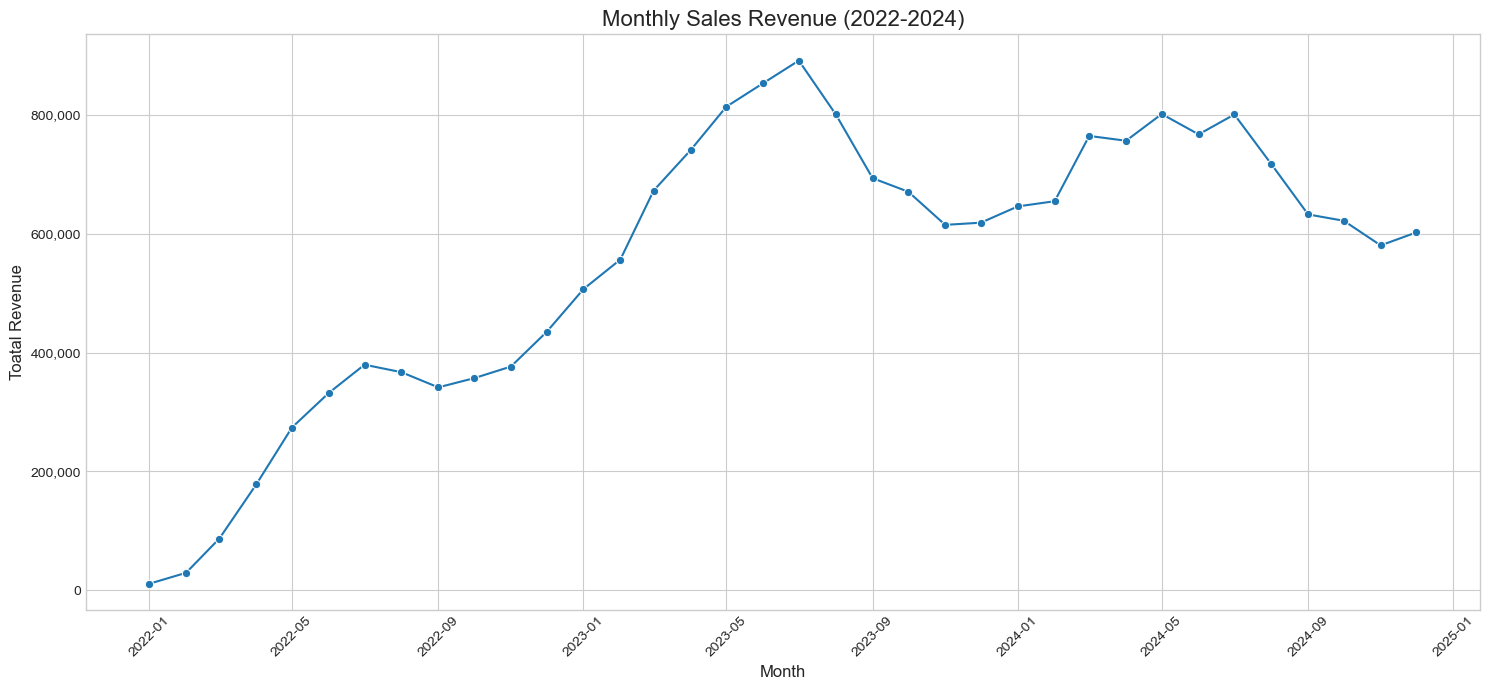

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

file_path = 'sales_data.csv'
df=pd.read_csv(file_path)

df['revenue'] = df['units_sold'] * df['price_unit']
df['date'] = pd.to_datetime(df['date'])

df['month_year'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['revenue'].sum().reset_index()

monthly_sales['month_year'] = monthly_sales['month_year'].dt.to_timestamp()

def adaptive_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    else:
        return f'{int(x):,}'

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 7))

ax=sns.lineplot(data=monthly_sales, x='month_year', y='revenue', marker='o')

plt.title('Monthly Sales Revenue (2022-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Toatal Revenue', fontsize=12)
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(FuncFormatter(adaptive_formatter))

plt.tight_layout()

plt.show()

### 1.2 Top Performing Categories and Brands

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\1885520554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


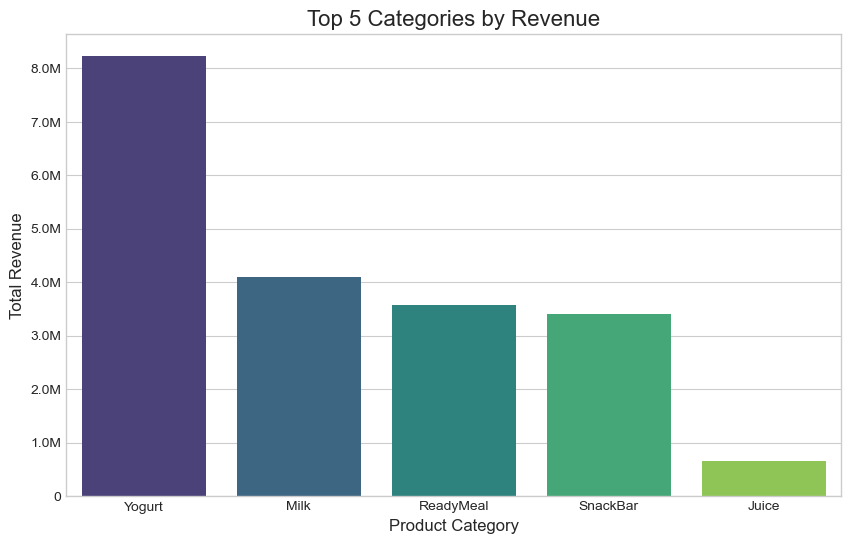

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\1885520554.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top_brands.index, y=top_brands.values, palette='plasma')


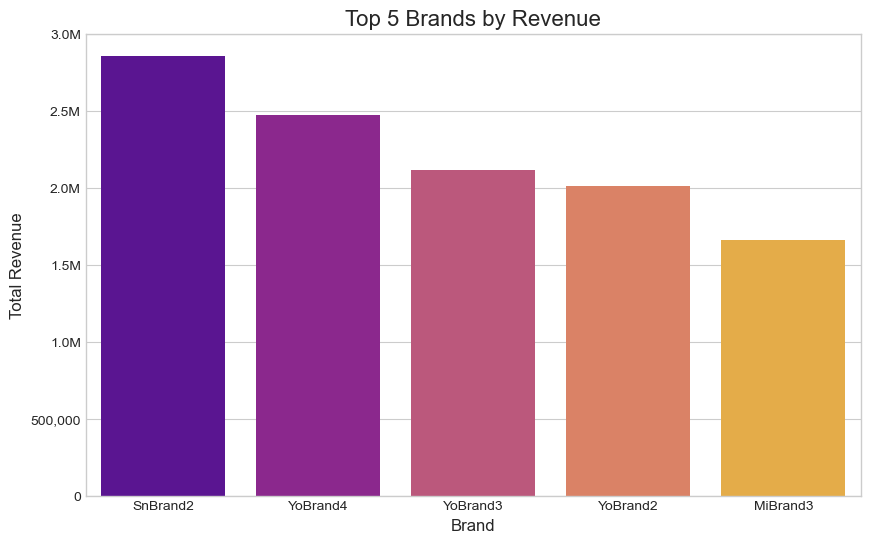

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

file_path = 'sales_data.csv'
df = pd.read_csv(file_path)
df['revenue'] = df['units_sold'] * df['price_unit']

def adaptive_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    else:
        return f'{int(x):,}'

top_categories = df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(5)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title('Top 5 Categories by Revenue', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(adaptive_formatter))
plt.show()

top_brands = df.groupby('brand')['revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=top_brands.index, y=top_brands.values, palette='plasma')

plt.title('Top 5 Brands by Revenue', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
ax2.yaxis.set_major_formatter(FuncFormatter(adaptive_formatter))
plt.show()

### 1.3 Sales Channel Performance

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\3201820287.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette='cubehelix')


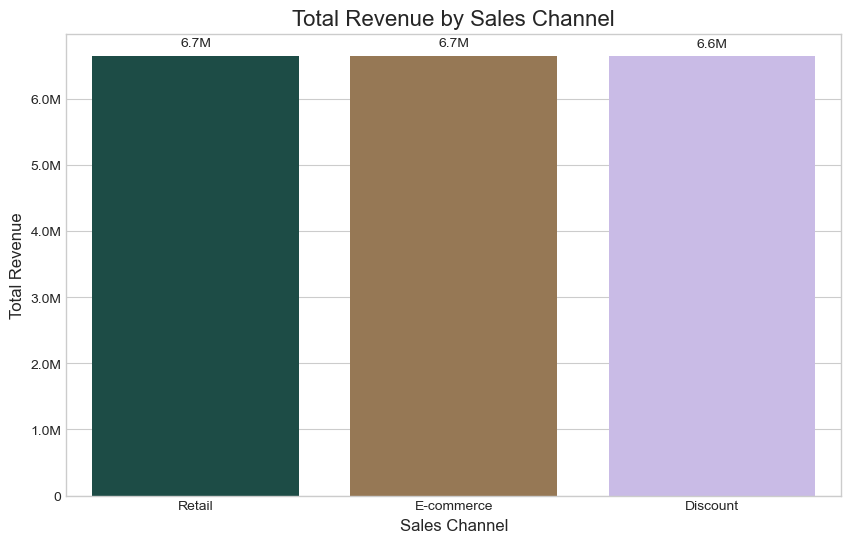

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

file_path = 'sales_data.csv'
df = pd.read_csv(file_path)
df['revenue'] = df['units_sold'] * df['price_unit']

def adaptive_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    else:
        return f'{int(x):,}'

channel_revenue = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette='cubehelix')

plt.title('Total Revenue by Sales Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(adaptive_formatter))

for p in ax.patches:
    ax.annotate(adaptive_formatter(p.get_height(), None),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

### 1.4 Regional Sales Performance

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\2773595827.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='magma')


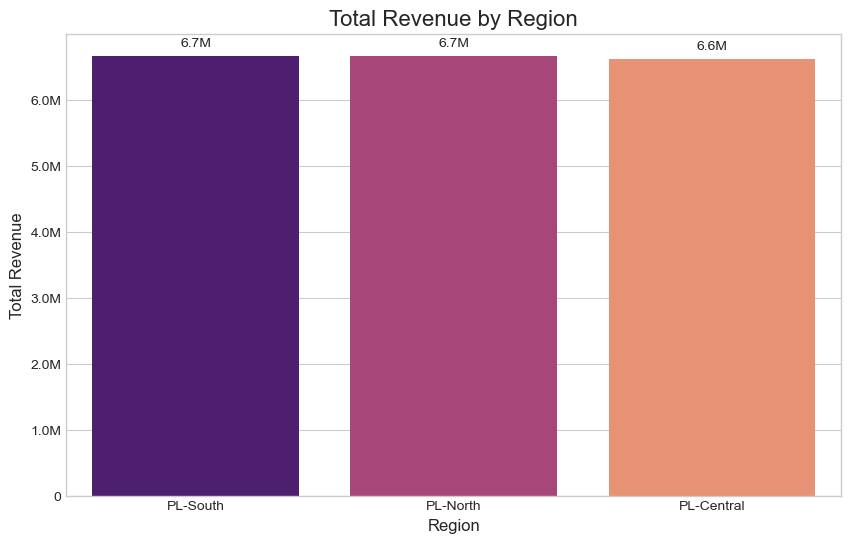

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


file_path = 'sales_data.csv'
df = pd.read_csv(file_path)
df['revenue'] = df['units_sold'] * df['price_unit']


def adaptive_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    else:
        return f'{int(x):,}'

region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='magma')

plt.title('Total Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(adaptive_formatter))

for p in ax.patches:
    ax.annotate(adaptive_formatter(p.get_height(), None),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

### 1.5 Promotion Impact Analysis

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\1556323897.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=promo_impact, x='promotion_status', y='units_sold', palette='coolwarm')


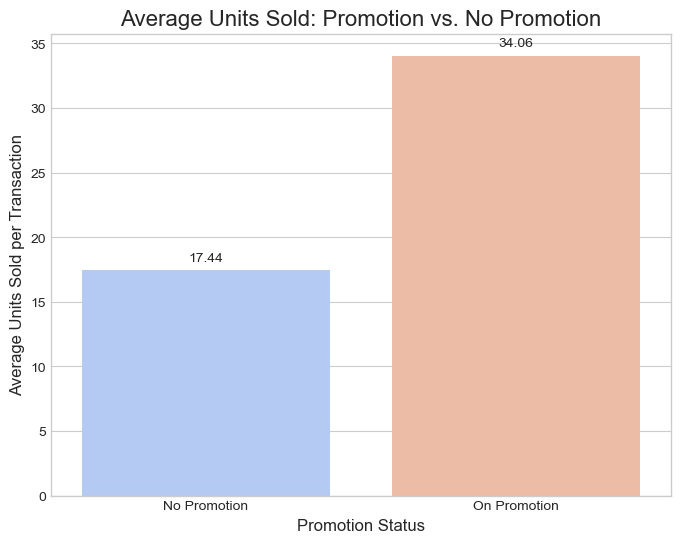

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'sales_data.csv'
df = pd.read_csv(file_path)
df['revenue'] = df['units_sold'] * df['price_unit']


promo_impact = df.groupby('promotion_flag')['units_sold'].mean().reset_index()

promo_impact['promotion_status'] = promo_impact['promotion_flag'].map({0: 'No Promotion', 1: 'On Promotion'})

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=promo_impact, x='promotion_status', y='units_sold', palette='coolwarm')

plt.title('Average Units Sold: Promotion vs. No Promotion', fontsize=16)
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Average Units Sold per Transaction', fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

### 1.6 Stockout Analysis

Total number of stockout events: 3860

--- Top 5 SKUs with the Most Stockouts ---
sku
YO-005    177
YO-012    176
MI-006    166
RE-015    165
RE-007    157
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\2285434436.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_stockout_skus.index, y=top_stockout_skus.values, palette='Reds_r')


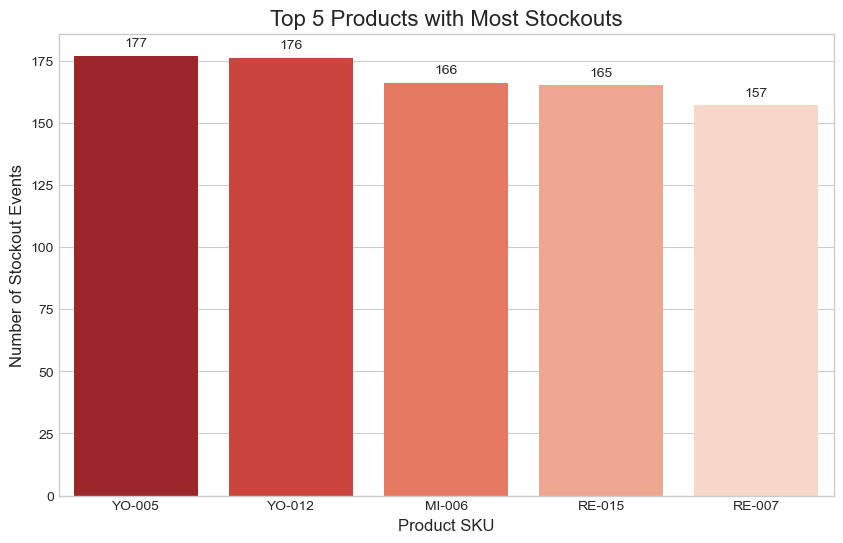

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'sales_data.csv'
df = pd.read_csv(file_path)


stockouts_df = df[df['stock_available'] == 0]

total_stockouts = len(stockouts_df)
print(f"Total number of stockout events: {total_stockouts}")

top_stockout_skus = stockouts_df['sku'].value_counts().head(5)

print("\n--- Top 5 SKUs with the Most Stockouts ---")
print(top_stockout_skus)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_stockout_skus.index, y=top_stockout_skus.values, palette='Reds_r')

plt.title('Top 5 Products with Most Stockouts', fontsize=16)
plt.xlabel('Product SKU', fontsize=12)
plt.ylabel('Number of Stockout Events', fontsize=12)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

## Part 2: Advanced Analytics & Predictive Modeling

### 2.1 Sales Forecasting with Prophet

--- Prepared Data Head ---
          ds        y
0 2022-01-21   440.34
1 2022-01-22   814.23
2 2022-01-23  1067.74
3 2022-01-24   837.30
4 2022-01-25   827.86


02:17:37 - cmdstanpy - INFO - Chain [1] start processing
02:17:37 - cmdstanpy - INFO - Chain [1] done processing



--- Forecast Data ---
             ds          yhat    yhat_lower    yhat_upper
1161 2025-03-27  23221.654035  21629.403479  24904.776272
1162 2025-03-28  23165.691441  21496.596001  24895.921449
1163 2025-03-29  23174.810523  21482.829076  24654.546027
1164 2025-03-30  23299.002184  21733.046945  24911.200155
1165 2025-03-31  23365.991843  21792.527741  25025.910758

Plotting the forecast...


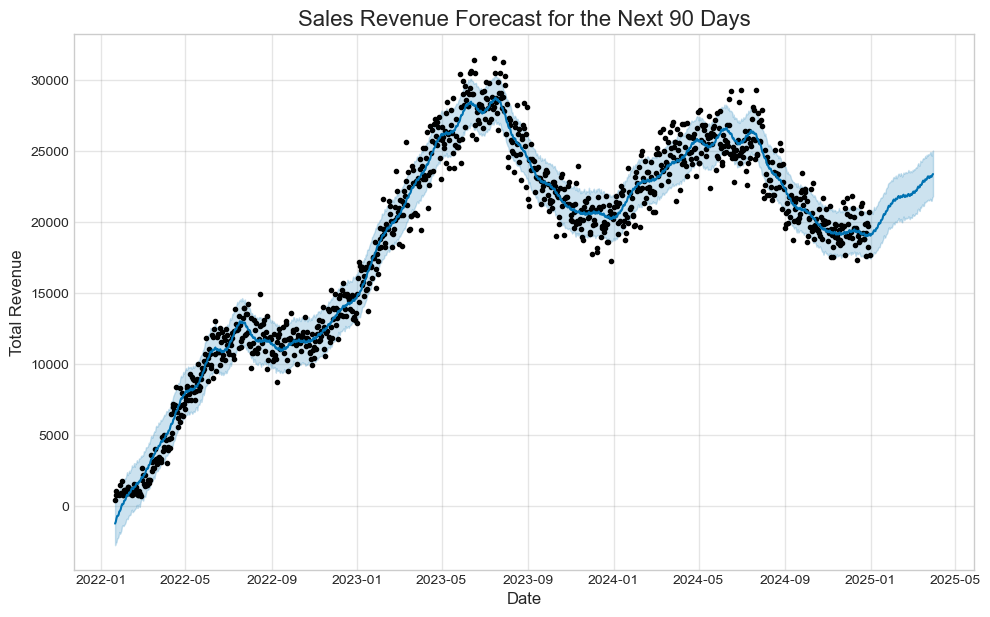

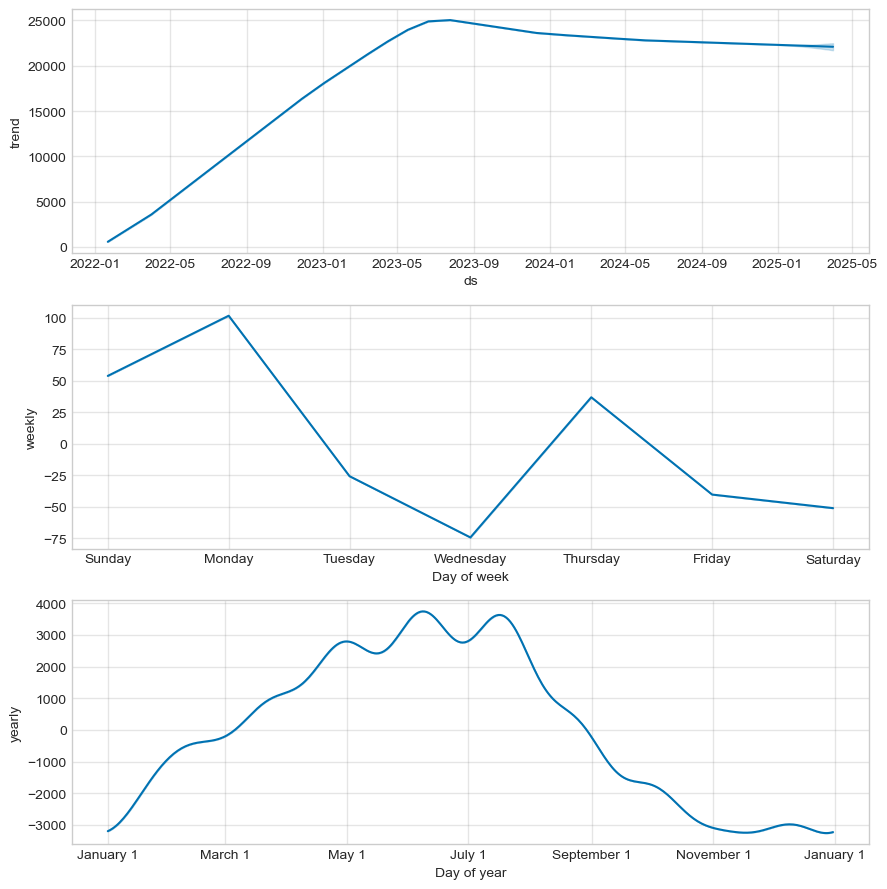

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


file_path = 'sales_data.csv'
df = pd.read_csv(file_path)


df['revenue'] = df['units_sold'] * df['price_unit']


df['date'] = pd.to_datetime(df['date'])

daily_sales = df.groupby('date')['revenue'].sum().reset_index()
daily_sales.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

print("--- Prepared Data Head ---")
print(daily_sales.head())


model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

model.fit(daily_sales)


future = model.make_future_dataframe(periods=90)

forecast = model.predict(future)

print("\n--- Forecast Data ---")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


print("\nPlotting the forecast...")
fig = model.plot(forecast)


plt.title('Sales Revenue Forecast for the Next 90 Days', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

plt.show()

fig2 = model.plot_components(forecast)
plt.show()

## 2.2 Predictive Modeling: What Drives High Sales?
#### Baseline Model: Random Forest Classifier

Training the Random Forest model...

--- Model Evaluation ---
Model Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65     33623
           1       0.50      0.49      0.49     23605

    accuracy                           0.59     57228
   macro avg       0.57      0.57      0.57     57228
weighted avg       0.59      0.59      0.59     57228



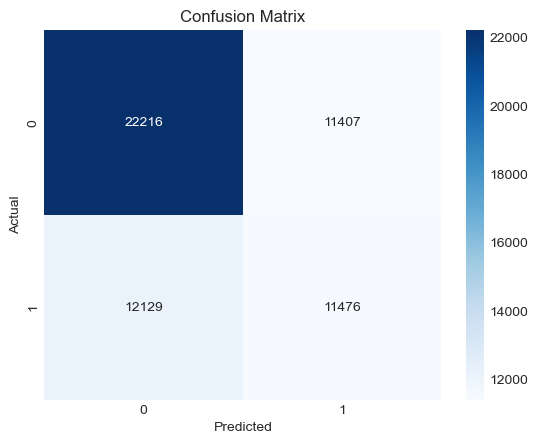


--- Feature Importance ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\4056860037.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')


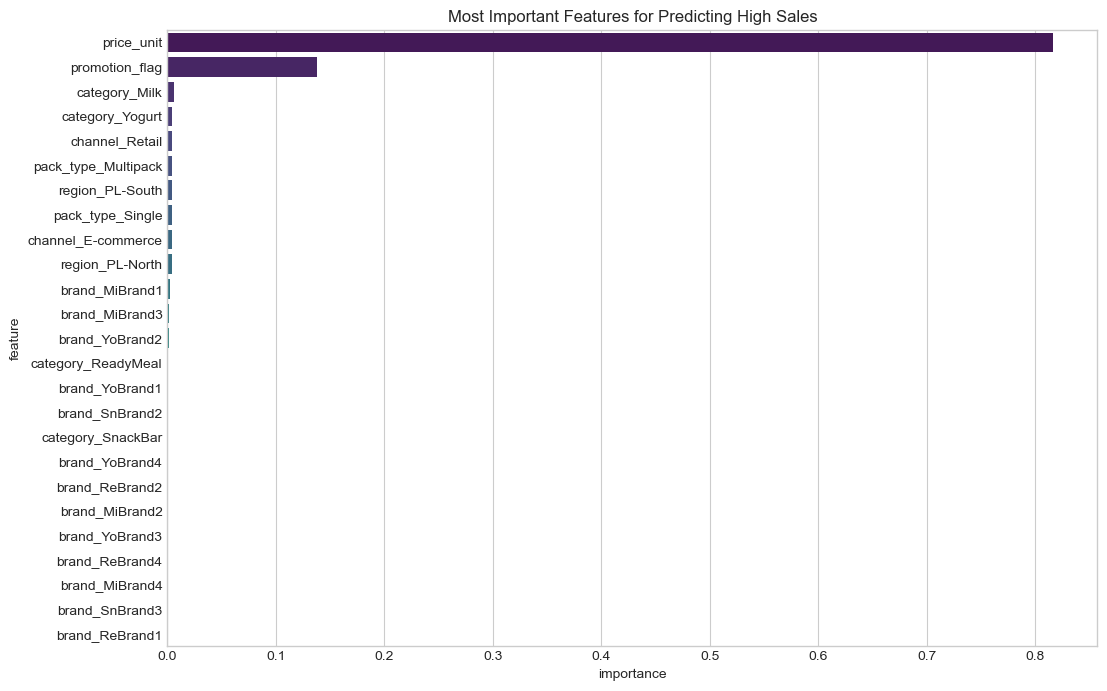

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


file_path = 'sales_data.csv'
df = pd.read_csv(file_path)


average_units_sold = df['units_sold'].mean()
df['sells_well'] = (df['units_sold'] > average_units_sold).astype(int) 

features = ['brand', 'category', 'channel', 'region', 'pack_type', 'price_unit', 'promotion_flag']
target = 'sells_well'

X = df[features]
y = df[target]


X = pd.get_dummies(X, columns=['brand', 'category', 'channel', 'region', 'pack_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("\n--- Model Evaluation ---")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n--- Feature Importance ---")
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Most Important Features for Predicting High Sales')
plt.show()

### Improved Model: XGBoost Classifier

Training the XGBoost model...


C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:19:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Model Evaluation ---
Model Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.78     33623
           1       0.78      0.31      0.45     23605

    accuracy                           0.68     57228
   macro avg       0.72      0.63      0.61     57228
weighted avg       0.71      0.68      0.64     57228


--- Feature Importance ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21344\388666748.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')


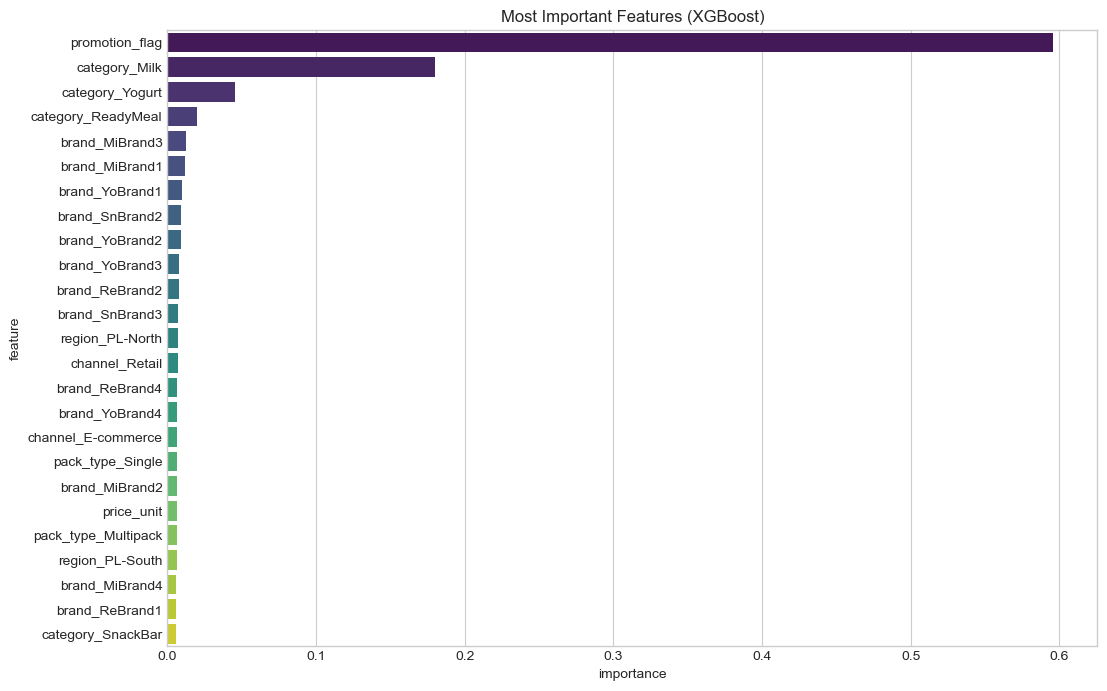

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = 'sales_data.csv'
df = pd.read_csv(file_path)


average_units_sold = df['units_sold'].mean()
df['sells_well'] = (df['units_sold'] > average_units_sold).astype(int)

features = ['brand', 'category', 'channel', 'region', 'pack_type', 'price_unit', 'promotion_flag']
target = 'sells_well'
X = df[features]
y = df[target]


X = pd.get_dummies(X, columns=['brand', 'category', 'channel', 'region', 'pack_type'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Training the XGBoost model...")

model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


print("\n--- XGBoost Model Evaluation ---")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\n--- Feature Importance ---")
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Most Important Features (XGBoost)')
plt.show()

# Project Conclusion
This project successfully analyzed a 3-year FMCG sales dataset to deliver key business insights and a predictive sales forecast.

### Key Findings & Outcomes:
* **Identified Strong Growth:** EDA revealed a consistent upward trend in monthly sales revenue.
* **Pinpointed Key Sales Drivers:** An XGBoost machine learning model was built (68% accuracy) which identified **price** and **promotions** as the most significant factors in driving high-volume sales.
* **Delivered a Sales Forecast:** A Prophet time-series model was developed to accurately forecast sales revenue for the next 90 days.
* **Created an Interactive Dashboard:** A comprehensive Power BI dashboard was built to allow for easy, interactive exploration of all key sales and operational metrics.